# 미국 데이터 시각화

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
hours_raw = pd.read_csv('/content/drive/MyDrive/Data_Analysis_multicampus/national_working_hours_average.csv')
salary_raw = pd.read_csv('/content/drive/MyDrive/Data_Analysis_multicampus/national_weekly_earnings_average.csv')

In [ ]:
hours = hours_raw
salary = salary_raw

데이터 출처: [U.S. Bureau of Labor Statistics](https://www.bls.gov/data/)



## 데이터 전처리
- 산업 코드 이름 변경

- 코드 index
  - Mining and Logging
    - CES1000000002
    - CES1000000011
  - Construction
    - CES2000000002
    - CES2000000011
  - Manufacturing
    - CES3000000002
    - CES3000000011
  - Wholesale Trade
    - CES4142000002
    - CES4142000011
  - Retail Trade
    - CES4200000002
    - CES4200000011
  - Transportation and Warehousing
    - CES4300000002
    - CES4300000011
  - Utilities
    - CES4422000002
    - CES4422000011
  - Information
    - CES5000000002
    - CES5000000011
  - Financial activities
    - CES5500000002
    - CES5500000011
  - Professoinal and Business Services
    - CES6000000002
    - CES6000000011
  - Leisure and Hospitality
    - CES7000000002
    - CES7000000011
  - Other services
    - CES8000000002
    - CES8000000011

In [ ]:
industry = ['광업 및 벌목업', '건설업', '제조업', '도매업', '소매업', '운수업', '전기, 가스, 증기 및 수도사업', '정보산업', 
            '금융업', '전문, 과학 및 기술 서비스업', '예술, 스포츠 및 여가 관련 서비스업', '기타 산업']

In [ ]:
salary['산업'] = industry
salary.head()

,Series ID,Jan 2017,Feb 2017,Mar 2017,Apr 2017,May 2017,Jun 2017,Jul 2017,Aug 2017,Sep 2017,...,May 2021,Jun 2021,Jul 2021,Aug 2021,Sep 2021,Oct 2021,Nov 2021,Dec 2021,Annual 2021,산업
0,CES1000000011,1413.14,1431.66,1448.21,1439.18,1448.27,1436.44,1468.32,1438.15,1450.51,...,1570.25,1569.34,1567.46,1567.63,1582.90,1570.76,1599.63,1598.80,,광업 및 벌목업
1,CES2000000011,1110.60,1111.50,1114.10,1117.87,1126.22,1129.99,1129.05,1129.83,1136.07,...,1272.42,1270.13,1278.07,1283.50,1315.91,1292.19,1301.21,1311.96,,건설업
2,CES3000000011,1076.71,1074.89,1072.65,1083.24,1082.42,1083.24,1090.80,1084.87,1087.10,...,1193.82,1195.30,1206.90,1206.75,1215.41,1215.05,1220.89,1225.74,,제조업
3,CES4142000011,1158.44,1159.61,1157.66,1162.20,1163.37,1166.10,1170.65,1169.09,1174.56,...,1311.24,1315.94,1326.77,1324.71,1337.38,1346.69,1343.38,1350.83,,도매업
4,CES4200000011,555.58,554.09,556.20,560.42,561.41,559.91,561.45,563.93,562.69,...,673.31,675.14,672.64,673.87,677.48,684.00,697.32,709.42,,소매업


In [ ]:
salary.set_index('산업', inplace=True)
salary.drop(columns='Series ID', inplace=True)

In [ ]:
salary.head()

,Jan 2017,Feb 2017,Mar 2017,Apr 2017,May 2017,Jun 2017,Jul 2017,Aug 2017,Sep 2017,Oct 2017,...,Apr 2021,May 2021,Jun 2021,Jul 2021,Aug 2021,Sep 2021,Oct 2021,Nov 2021,Dec 2021,Annual 2021
산업,,,,,,,,,,,,,,,,,,,,,
광업 및 벌목업,1413.14,1431.66,1448.21,1439.18,1448.27,1436.44,1468.32,1438.15,1450.51,1457.82,...,1577.20,1570.25,1569.34,1567.46,1567.63,1582.90,1570.76,1599.63,1598.80,
건설업,1110.60,1111.50,1114.10,1117.87,1126.22,1129.99,1129.05,1129.83,1136.07,1141.11,...,1272.71,1272.42,1270.13,1278.07,1283.50,1315.91,1292.19,1301.21,1311.96,
제조업,1076.71,1074.89,1072.65,1083.24,1082.42,1083.24,1090.80,1084.87,1087.10,1093.67,...,1185.34,1193.82,1195.30,1206.90,1206.75,1215.41,1215.05,1220.89,1225.74,
도매업,1158.44,1159.61,1157.66,1162.20,1163.37,1166.10,1170.65,1169.09,1174.56,1168.31,...,1302.42,1311.24,1315.94,1326.77,1324.71,1337.38,1346.69,1343.38,1350.83,
소매업,555.58,554.09,556.20,560.42,561.41,559.91,561.45,563.93,562.69,563.31,...,666.82,673.31,675.14,672.64,673.87,677.48,684.00,697.32,709.42,


In [ ]:
hours['산업'] = industry
hours.head()

,Series ID,Jan 2017,Feb 2017,Mar 2017,Apr 2017,May 2017,Jun 2017,Jul 2017,Aug 2017,Sep 2017,...,May 2021,Jun 2021,Jul 2021,Aug 2021,Sep 2021,Oct 2021,Nov 2021,Dec 2021,Annual 2021,산업
0,CES1000000002,43.90,44.60,45.20,45.40,45.50,45.10,45.60,44.90,45.30,...,45.20,45.20,44.90,44.70,45.20,44.70,45.20,45.10,,광업 및 벌목업
1,CES2000000002,38.90,39.00,38.90,39.10,39.20,39.10,39.00,39.00,39.00,...,38.90,38.70,38.80,38.80,39.60,38.70,38.90,39.00,,건설업
2,CES3000000002,40.80,40.70,40.60,40.80,40.80,40.80,40.90,40.80,40.70,...,40.40,40.30,40.50,40.40,40.50,40.30,40.40,40.40,,제조업
3,CES4142000002,38.90,38.90,38.90,39.00,39.00,39.00,39.10,39.10,39.10,...,39.20,39.20,39.30,39.10,39.30,39.40,39.20,39.20,,도매업
4,CES4200000002,30.90,30.80,30.90,31.10,31.00,30.90,30.90,30.90,30.90,...,30.90,30.80,30.70,30.70,30.60,30.70,31.20,31.60,,소매업


In [ ]:
hours.set_index('산업', inplace=True)
hours.drop(columns='Series ID', inplace=True)

In [ ]:
hours.head()

,Jan 2017,Feb 2017,Mar 2017,Apr 2017,May 2017,Jun 2017,Jul 2017,Aug 2017,Sep 2017,Oct 2017,...,Apr 2021,May 2021,Jun 2021,Jul 2021,Aug 2021,Sep 2021,Oct 2021,Nov 2021,Dec 2021,Annual 2021
산업,,,,,,,,,,,,,,,,,,,,,
광업 및 벌목업,43.90,44.60,45.20,45.40,45.50,45.10,45.60,44.90,45.30,45.50,...,45.40,45.20,45.20,44.90,44.70,45.20,44.70,45.20,45.10,
건설업,38.90,39.00,38.90,39.10,39.20,39.10,39.00,39.00,39.00,39.20,...,39.10,38.90,38.70,38.80,38.80,39.60,38.70,38.90,39.00,
제조업,40.80,40.70,40.60,40.80,40.80,40.80,40.90,40.80,40.70,40.90,...,40.40,40.40,40.30,40.50,40.40,40.50,40.30,40.40,40.40,
도매업,38.90,38.90,38.90,39.00,39.00,39.00,39.10,39.10,39.10,39.10,...,39.10,39.20,39.20,39.30,39.10,39.30,39.40,39.20,39.20,
소매업,30.90,30.80,30.90,31.10,31.00,30.90,30.90,30.90,30.90,30.90,...,30.90,30.90,30.80,30.70,30.70,30.60,30.70,31.20,31.60,


- 주 단위로 나누어져 있는 근로시간을 월로 바꿔 연평균 계산

In [ ]:
# 2017년
(hours.iloc[:, :12]*4).sum(axis=1)/12

산업
광업 및 벌목업               180.73
건설업                    156.33
제조업                    163.20
도매업                    156.20
소매업                    123.87
운수업                    154.90
전기, 가스, 증기 및 수도사업      168.83
정보산업                   144.90
금융업                    149.83
전문, 과학 및 기술 서비스업       144.20
예술, 스포츠 및 여가 관련 서비스업   104.17
기타 산업                  127.07
dtype: float64

In [ ]:
avg_hours_2017 = ((hours.iloc[:, :12]*4).sum(axis=1)/12).to_list()

In [ ]:
hours['Annual 2017'] = avg_hours_2017

In [ ]:
hours['Annual 2017']

산업
광업 및 벌목업               180.73
건설업                    156.33
제조업                    163.20
도매업                    156.20
소매업                    123.87
운수업                    154.90
전기, 가스, 증기 및 수도사업      168.83
정보산업                   144.90
금융업                    149.83
전문, 과학 및 기술 서비스업       144.20
예술, 스포츠 및 여가 관련 서비스업   104.17
기타 산업                  127.07
Name: Annual 2017, dtype: float64

In [ ]:
# 2018년
avg_hours_2018 = ((hours.iloc[:, 13:25]*4).sum(axis=1)/12).to_list()

In [ ]:
hours['Annual 2018'] = avg_hours_2018

In [ ]:
# 2019년
avg_hours_2019 = ((hours.iloc[:, 26:38]*4).sum(axis=1)/12).to_list()

In [ ]:
hours['Annual 2019'] = avg_hours_2019

In [ ]:
# 2020년
avg_hours_2020 = ((hours.iloc[:, 39:51]*4).sum(axis=1)/12).to_list()

In [ ]:
hours['Annual 2020'] = avg_hours_2020

In [ ]:
# 2021년
avg_hours_2021 = ((hours.iloc[:, 52:64]*4).sum(axis=1)/12).to_list()

In [ ]:
hours['Annual 2021'] = avg_hours_2021

In [ ]:
hours[['Annual 2017', 'Annual 2018', 'Annual 2019', 'Annual 2020', 'Annual 2021']]

,Annual 2017,Annual 2018,Annual 2019,Annual 2020,Annual 2021
산업,,,,,
광업 및 벌목업,180.73,183.70,184.93,177.43,180.40
건설업,156.33,156.80,157.00,155.50,155.77
제조업,163.20,163.60,162.17,159.30,161.60
도매업,156.20,156.13,155.63,153.87,156.60
소매업,123.87,123.90,122.47,123.03,123.33
운수업,154.90,155.90,153.93,153.47,155.23
"전기, 가스, 증기 및 수도사업",168.83,168.47,169.07,170.80,169.93
정보산업,144.90,144.23,145.30,146.27,148.23
금융업,149.83,150.47,150.53,150.57,150.30


In [ ]:
avg_hours = hours[['Annual 2017', 'Annual 2018', 'Annual 2019', 'Annual 2020', 'Annual 2021']]

- 주 단위로 나누어져 있는 임금을 월로 바꿔 임금 계산

In [ ]:
# 2017년
(salary.iloc[:, :12]*4).sum(axis=1)

산업
광업 및 벌목업               69455.12
건설업                    54181.52
제조업                    52074.24
도매업                    56043.52
소매업                    26953.64
운수업                    44182.28
전기, 가스, 증기 및 수도사업      79516.12
정보산업                   66568.44
금융업                    59704.32
전문, 과학 및 기술 서비스업       54709.20
예술, 스포츠 및 여가 관련 서비스업   19350.28
기타 산업                  36362.36
dtype: float64

In [ ]:
tot_salary_2017 = ((salary.iloc[:, :12]*4).sum(axis=1)).to_list()

In [ ]:
salary['Annual 2017'] = tot_salary_2017
salary['Annual 2017']

산업
광업 및 벌목업               69455.12
건설업                    54181.52
제조업                    52074.24
도매업                    56043.52
소매업                    26953.64
운수업                    44182.28
전기, 가스, 증기 및 수도사업      79516.12
정보산업                   66568.44
금융업                    59704.32
전문, 과학 및 기술 서비스업       54709.20
예술, 스포츠 및 여가 관련 서비스업   19350.28
기타 산업                  36362.36
Name: Annual 2017, dtype: float64

In [ ]:
# 2018년
tot_salary_2018 = ((salary.iloc[:, 13:25]*4).sum(axis=1)).to_list()
salary['Annual 2018'] = tot_salary_2018

In [ ]:
# 2019년
tot_salary_2019 = ((salary.iloc[:, 26:38]*4).sum(axis=1)).to_list()
salary['Annual 2019'] = tot_salary_2019

In [ ]:
# 2020년
tot_salary_2020 = ((salary.iloc[:, 39:51]*4).sum(axis=1)).to_list()
salary['Annual 2020'] = tot_salary_2020

In [ ]:
# 2021년
tot_salary_2021 = ((salary.iloc[:, 52:64]*4).sum(axis=1)).to_list()
salary['Annual 2021'] = tot_salary_2021

In [ ]:
tot_salary = salary[['Annual 2017', 'Annual 2018', 'Annual 2019', 'Annual 2020', 'Annual 2021']]
tot_salary

,Annual 2017,Annual 2018,Annual 2019,Annual 2020,Annual 2021
산업,,,,,
광업 및 벌목업,69455.12,71654.24,74804.52,73657.44,75523.04
건설업,54181.52,56235.60,57951.04,59047.60,61454.76
제조업,52074.24,53086.40,53911.16,55010.84,57587.80
도매업,56043.52,57044.52,58589.28,59764.00,63306.36
소매업,26953.64,27889.28,28900.16,30759.12,32365.92
운수업,44182.28,45355.92,45669.48,46628.40,49069.36
"전기, 가스, 증기 및 수도사업",79516.12,82105.96,84662.64,89158.56,91534.68
정보산업,66568.44,69300.80,73562.20,76895.16,79063.96
금융업,59704.32,62742.40,64890.36,68377.24,72358.00


### 컬럼명 정리

In [ ]:
col = ['2017', '2018', '2019', '2020', '2021']

In [ ]:
avg_hours.columns = col
tot_salary.columns = col

In [ ]:
# 단위: 시간
avg_hours

,2017,2018,2019,2020,2021
산업,,,,,
광업 및 벌목업,180.73,183.70,184.93,177.43,180.40
건설업,156.33,156.80,157.00,155.50,155.77
제조업,163.20,163.60,162.17,159.30,161.60
도매업,156.20,156.13,155.63,153.87,156.60
소매업,123.87,123.90,122.47,123.03,123.33
운수업,154.90,155.90,153.93,153.47,155.23
"전기, 가스, 증기 및 수도사업",168.83,168.47,169.07,170.80,169.93
정보산업,144.90,144.23,145.30,146.27,148.23
금융업,149.83,150.47,150.53,150.57,150.30


In [ ]:
# 단위: 달러
tot_salary

,2017,2018,2019,2020,2021
산업,,,,,
광업 및 벌목업,69455.12,71654.24,74804.52,73657.44,75523.04
건설업,54181.52,56235.60,57951.04,59047.60,61454.76
제조업,52074.24,53086.40,53911.16,55010.84,57587.80
도매업,56043.52,57044.52,58589.28,59764.00,63306.36
소매업,26953.64,27889.28,28900.16,30759.12,32365.92
운수업,44182.28,45355.92,45669.48,46628.40,49069.36
"전기, 가스, 증기 및 수도사업",79516.12,82105.96,84662.64,89158.56,91534.68
정보산업,66568.44,69300.80,73562.20,76895.16,79063.96
금융업,59704.32,62742.40,64890.36,68377.24,72358.00


In [ ]:
avg_hours.to_csv('us_hours_monthly.csv')
tot_salary.to_csv('us_salary_total.csv')

## 데이터 시각화

In [ ]:
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
sns.set_palette('twilight_shifted_r')
sns.set_style('darkgrid')
sns.set_context('notebook')

In [ ]:
plt.rc('font', family='NanumBarunGothic')

### 기본 시각화

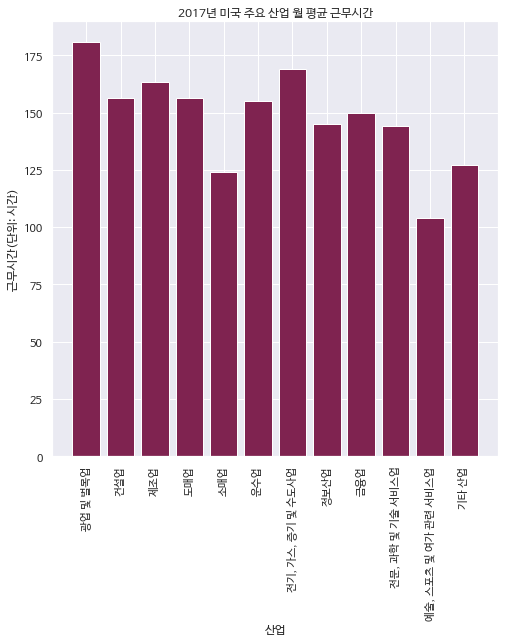

In [ ]:
plt.figure(figsize=(8,8))
plt.title('2017년 미국 주요 산업 월 평균 근무시간')
plt.bar(industry, avg_hours['2017'])
plt.xlabel('산업')
plt.ylabel('근무시간(단위: 시간)')
plt.xticks(rotation=90)
plt.show()

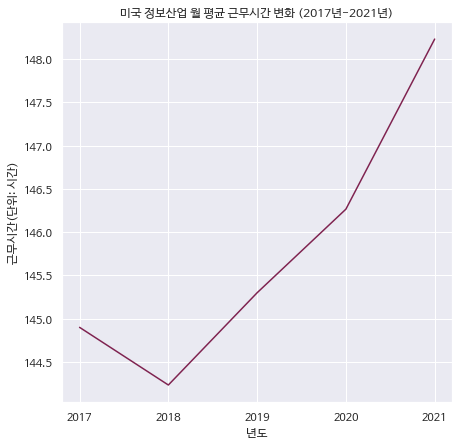

In [ ]:
plt.figure(figsize=(7,7))
plt.title('미국 정보산업 월 평균 근무시간 변화 (2017년-2021년)')
plt.plot(col, avg_hours.iloc[7])
plt.xlabel('년도')
plt.ylabel('근무시간(단위: 시간)')
plt.show()

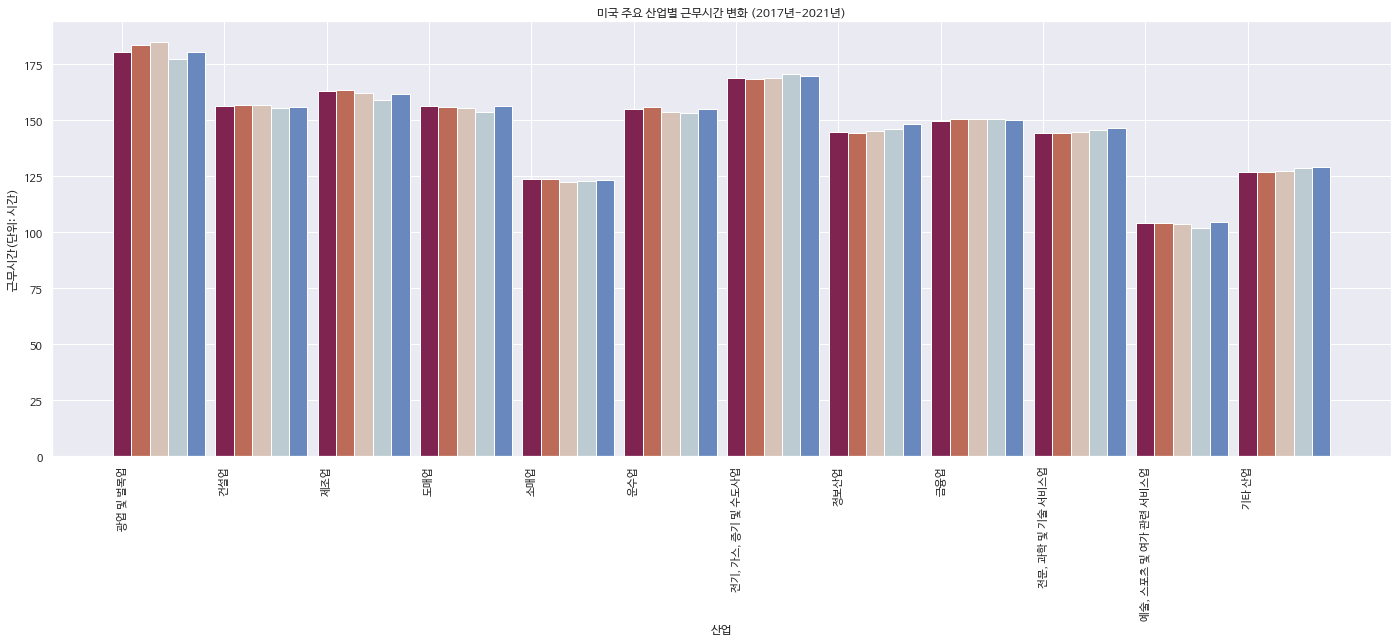

In [ ]:
plt.figure(figsize=(24,8))
bar_width = 0.18
index = np.arange(12)

plt.title('미국 주요 산업별 근무시간 변화 (2017년-2021년)')
plt.bar(index, avg_hours['2017'], bar_width)
plt.bar(index+bar_width, avg_hours['2018'], bar_width)
plt.bar(index+bar_width*2, avg_hours['2019'], bar_width)
plt.bar(index+bar_width*3, avg_hours['2020'], bar_width)
plt.bar(index+bar_width*4, avg_hours['2021'], bar_width)
plt.xlabel('산업')
plt.ylabel('근무시간(단위: 시간)')
plt.xticks(index, industry, rotation=90)
plt.show()

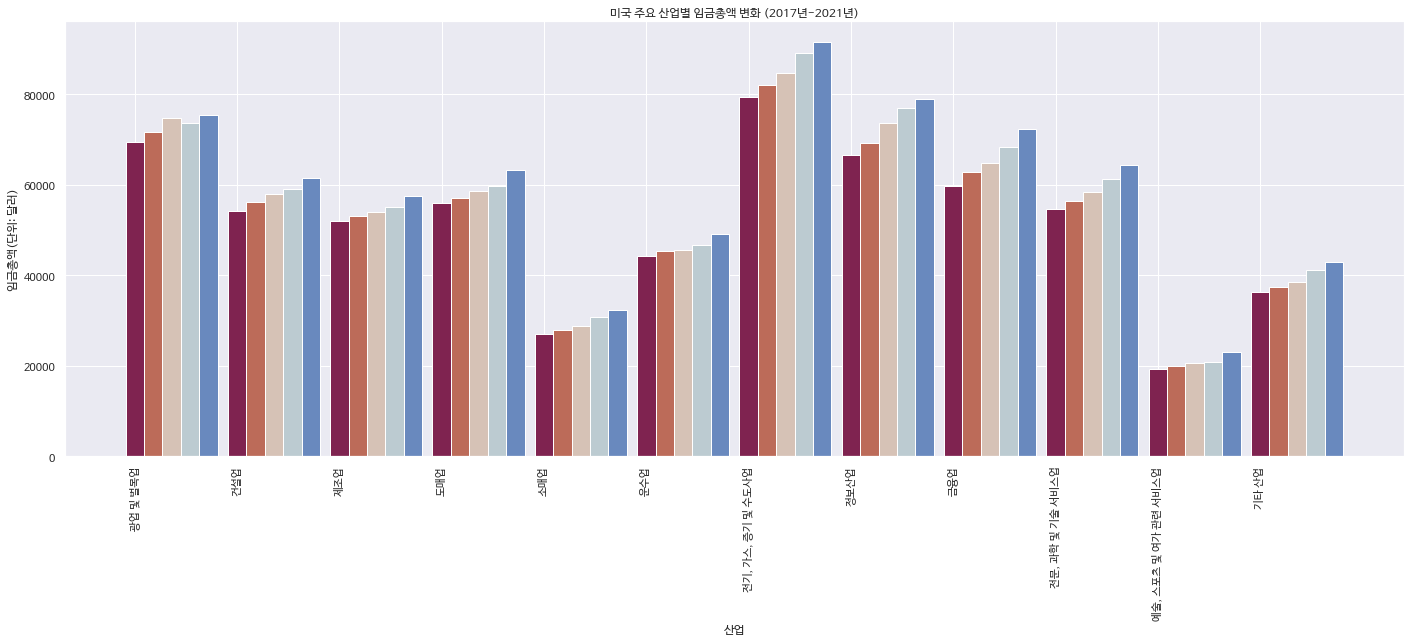

In [ ]:
plt.figure(figsize=(24,8))
bar_width = 0.18
index = np.arange(12)

plt.title('미국 주요 산업별 임금총액 변화 (2017년-2021년)')
plt.bar(index, tot_salary['2017'], bar_width)
plt.bar(index+bar_width, tot_salary['2018'], bar_width)
plt.bar(index+bar_width*2, tot_salary['2019'], bar_width)
plt.bar(index+bar_width*3, tot_salary['2020'], bar_width)
plt.bar(index+bar_width*4, tot_salary['2021'], bar_width)
plt.xlabel('산업')
plt.ylabel('임금총액(단위: 달러)')
plt.xticks(index, industry, rotation=90)
plt.show()

### 시간당 임금

#### 전처리

In [ ]:
# 시간당 임금 데이터프레임
dollar_per_hour = pd.DataFrame(index=industry)
dollar_per_hour

""
광업 및 벌목업
건설업
제조업
도매업
소매업
운수업
"전기, 가스, 증기 및 수도사업"
정보산업
금융업
"전문, 과학 및 기술 서비스업"


In [ ]:
# 2017년 주급을 근로시간으로 나누어 시간당 달러 계산
s = salary.iloc[:, :12].sum(axis=1)
h = hours.iloc[:, :12].sum(axis=1)
dph2017 = s / h
dph2017

산업
광업 및 벌목업               32.02
건설업                    28.88
제조업                    26.59
도매업                    29.90
소매업                    18.13
운수업                    23.77
전기, 가스, 증기 및 수도사업      39.25
정보산업                   38.28
금융업                    33.21
전문, 과학 및 기술 서비스업       31.62
예술, 스포츠 및 여가 관련 서비스업   15.48
기타 산업                  23.85
dtype: float64

In [ ]:
dollar_per_hour.loc[:,'2017'] = dph2017
dollar_per_hour

,2017
광업 및 벌목업,32.02
건설업,28.88
제조업,26.59
도매업,29.90
소매업,18.13
운수업,23.77
"전기, 가스, 증기 및 수도사업",39.25
정보산업,38.28
금융업,33.21
"전문, 과학 및 기술 서비스업",31.62


In [ ]:
s = salary.iloc[:, 13:25].sum(axis=1)
h = hours.iloc[:, 13:25].sum(axis=1)
dph2018 = s / h

In [ ]:
s = salary.iloc[:, 26:38].sum(axis=1)
h = hours.iloc[:, 26:38].sum(axis=1)
dph2019 = s / h

In [ ]:
s = salary.iloc[:, 39:51].sum(axis=1)
h = hours.iloc[:, 39:51].sum(axis=1)
dph2020 = s / h

In [ ]:
s = salary.iloc[:, 52:64].sum(axis=1)
h = hours.iloc[:, 52:64].sum(axis=1)
dph2021 = s / h

In [ ]:
dollar_per_hour.loc[:,'2018'] = dph2018
dollar_per_hour.loc[:,'2019'] = dph2019
dollar_per_hour.loc[:,'2020'] = dph2020
dollar_per_hour.loc[:,'2021'] = dph2021
dollar_per_hour

,2017,2018,2019,2020,2021
광업 및 벌목업,32.02,32.51,33.71,34.59,34.89
건설업,28.88,29.89,30.76,31.64,32.88
제조업,26.59,27.04,27.70,28.78,29.70
도매업,29.90,30.45,31.37,32.37,33.69
소매업,18.13,18.76,19.67,20.83,21.87
운수업,23.77,24.24,24.72,25.32,26.34
"전기, 가스, 증기 및 수도사업",39.25,40.61,41.73,43.50,44.89
정보산업,38.28,40.04,42.19,43.81,44.45
금융업,33.21,34.75,35.92,37.84,40.12
"전문, 과학 및 기술 서비스업",31.62,32.55,33.68,35.11,36.56


#### 시각화

In [ ]:
dollar_per_hour.T

,광업 및 벌목업,건설업,제조업,도매업,소매업,운수업,"전기, 가스, 증기 및 수도사업",정보산업,금융업,"전문, 과학 및 기술 서비스업","예술, 스포츠 및 여가 관련 서비스업",기타 산업
2017,32.02,28.88,26.59,29.90,18.13,23.77,39.25,38.28,33.21,31.62,15.48,23.85
2018,32.51,29.89,27.04,30.45,18.76,24.24,40.61,40.04,34.75,32.55,15.98,24.54
2019,33.71,30.76,27.70,31.37,19.67,24.72,41.73,42.19,35.92,33.68,16.56,25.19
2020,34.59,31.64,28.78,32.37,20.83,25.32,43.50,43.81,37.84,35.11,17.10,26.66
2021,34.89,32.88,29.70,33.69,21.87,26.34,44.89,44.45,40.12,36.56,18.40,27.61


In [ ]:
dph_t = dollar_per_hour.T

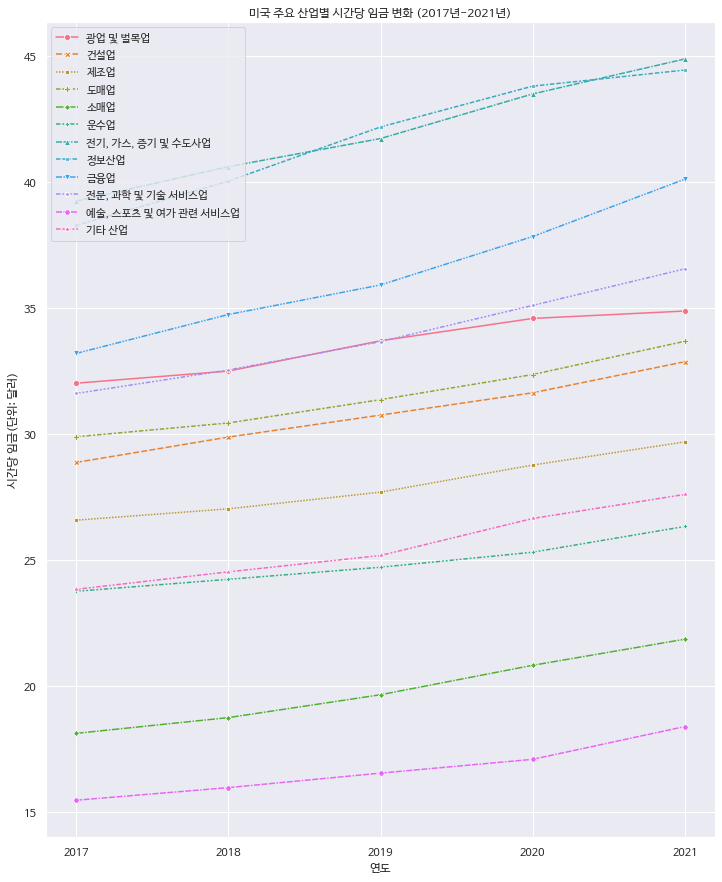

In [ ]:
plt.figure(figsize=(12,15))
bar_width = 0.18
index = np.arange(12)

plt.title('미국 주요 산업별 시간당 임금 변화 (2017년-2021년)')
sns.lineplot(data=dph_t, markers=True)
plt.xlabel('연도')
plt.ylabel('시간당 임금(단위: 달러)')
plt.legend(industry, loc=2)

plt.show()

### 코로나 이전/이후 시각화

**근로시간**

In [ ]:
avg_hours

,2017,2018,2019,2020,2021
산업,,,,,
광업 및 벌목업,180.73,183.70,184.93,177.43,180.40
건설업,156.33,156.80,157.00,155.50,155.77
제조업,163.20,163.60,162.17,159.30,161.60
도매업,156.20,156.13,155.63,153.87,156.60
소매업,123.87,123.90,122.47,123.03,123.33
운수업,154.90,155.90,153.93,153.47,155.23
"전기, 가스, 증기 및 수도사업",168.83,168.47,169.07,170.80,169.93
정보산업,144.90,144.23,145.30,146.27,148.23
금융업,149.83,150.47,150.53,150.57,150.30


In [ ]:
hours_before_c = avg_hours[['2017','2018','2019']].copy()
hours_after_c = avg_hours[['2020','2021']].copy()

In [ ]:
avg_hours[['2017','2018','2019']].mean(axis=1)

산업
광업 및 벌목업               183.12
건설업                    156.71
제조업                    162.99
도매업                    155.99
소매업                    123.41
운수업                    154.91
전기, 가스, 증기 및 수도사업      168.79
정보산업                   144.81
금융업                    150.28
전문, 과학 및 기술 서비스업       144.44
예술, 스포츠 및 여가 관련 서비스업   104.00
기타 산업                  127.22
dtype: float64

In [ ]:
hours_before_c = hours_before_c.assign(avg = hours_before_c.mean(axis=1))
hours_after_c = hours_after_c.assign(avg = hours_after_c.mean(axis=1))

In [ ]:
type(hours_before_c['avg'])

pandas.core.series.Series

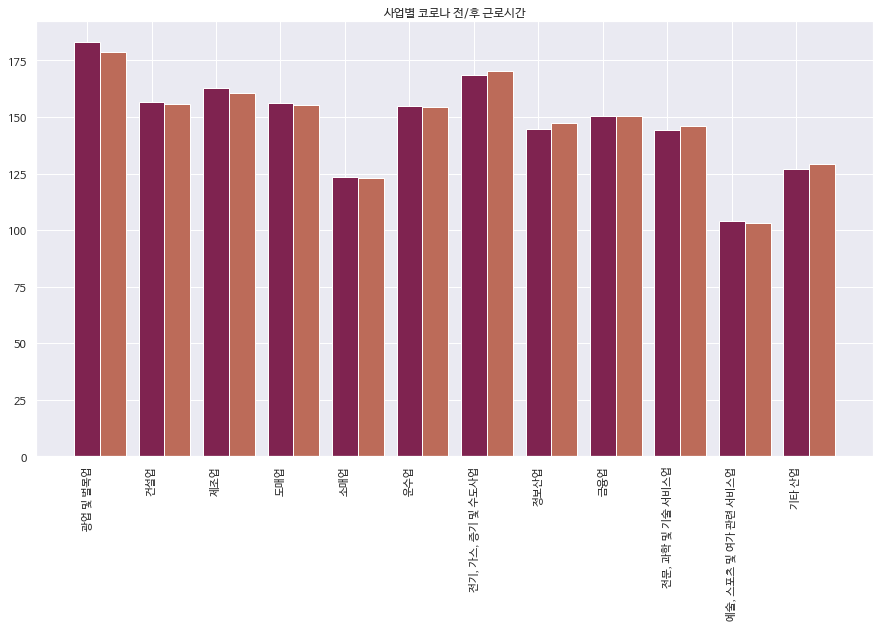

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
index = np.arange(12)
bar_width = 0.4

plt.title('사업별 코로나 전/후 근로시간')
plt.bar(index, hours_before_c['avg'], bar_width)
plt.bar(index+bar_width, hours_after_c['avg'], bar_width)
plt.xticks(index, industry, rotation=90)
plt.show()

**임금총액**

### 임금 파이 그래프

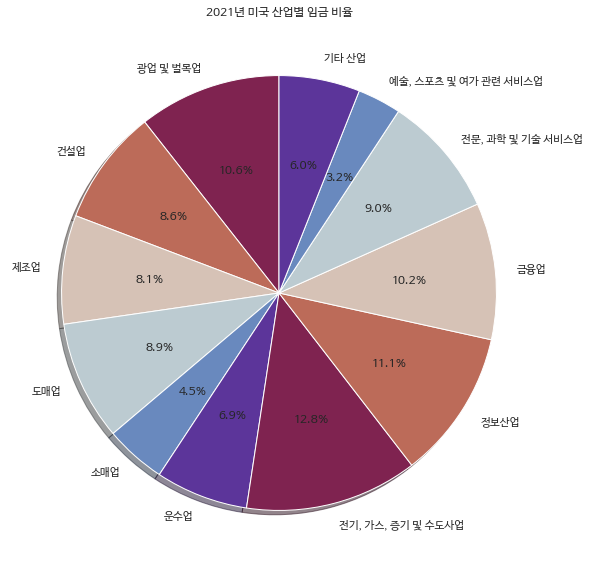

In [ ]:
size = tot_salary['2021']
explode=(0,0.4,0,0.5)

plt.figure(figsize=(10,10))
plt.title('2021년 미국 산업별 임금 비율')
plt.pie(size, labels=industry, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

### 근로시간 파이 그래프

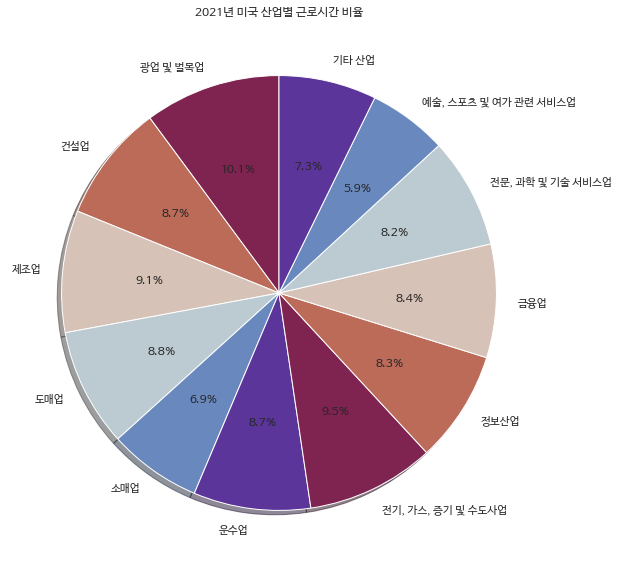

In [ ]:
size = avg_hours['2021']
explode=(0,0.4,0,0.5)

plt.figure(figsize=(10,10))
plt.title('2021년 미국 산업별 근로시간 비율')
plt.pie(size, labels=industry, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()